In [1]:
import sys
import os
sys.path.insert(0,'/content/NextFace') #verify ur path

In [2]:
from optimizer import Optimizer
from config import Config
config = Config()
config.fillFromDicFile('./optimConfig.ini')
# config.device = 'cuda' # torch not compiled with cuda
config.path = './baselMorphableModel/' #verify ur path


loading optim config from:  ./optimConfig.ini


In [3]:
import torch

imagePath = './input/detailled_faces_unsplash/Bikerman.jpg' #verify ur path
outputDir = './output/' + os.path.basename(imagePath.strip('/'))
# VALIDATE CUDA
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))
# # torch.cuda.set_device(torch.cuda.device(0) )
# # torch.backends.cudnn.benchmark = False
print(torch.cuda.device_count())
# torch.cuda.empty_cache()
torch.cuda.set_device(0)
    
optimizer = Optimizer(outputDir ,config)

True
NVIDIA GeForce RTX 4070 Laptop GPU
1
Loading Basel Face Model 2017 from ./baselMorphableModel//morphableModel-2017.pickle...
loading mesh normals...
loading uv parametrization...
loading landmarks association file...
creating sampler...


c:\Users\AQ14980\Desktop\repos\NextFace\faceNext\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


loading image from path:  ./input/detailled_faces_unsplash/Bikerman.jpg
detecting landmarks using: fan


c:\Users\AQ14980\Desktop\repos\NextFace\landmarksfan.py:38: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  return torch.tensor(landmarks, device = self.device)
init camera pose...
1/3 => Optimizing head pose and expressions using landmarks...
100%|██████████| 2000/2000 [00:15<00:00, 128.46it/s]
took 0.26 minutes to optimize
saving to: ' ./output/Bikerman.jpg/ '. hold on... 


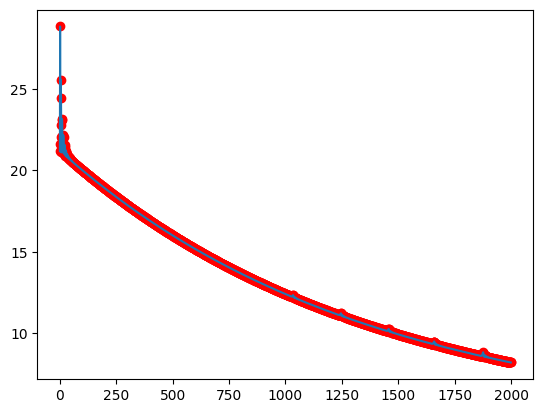

In [4]:
#run the optimization now 
optimizer.run(imagePath,doStep1=True,doStep2=False, doStep3=False)

Results

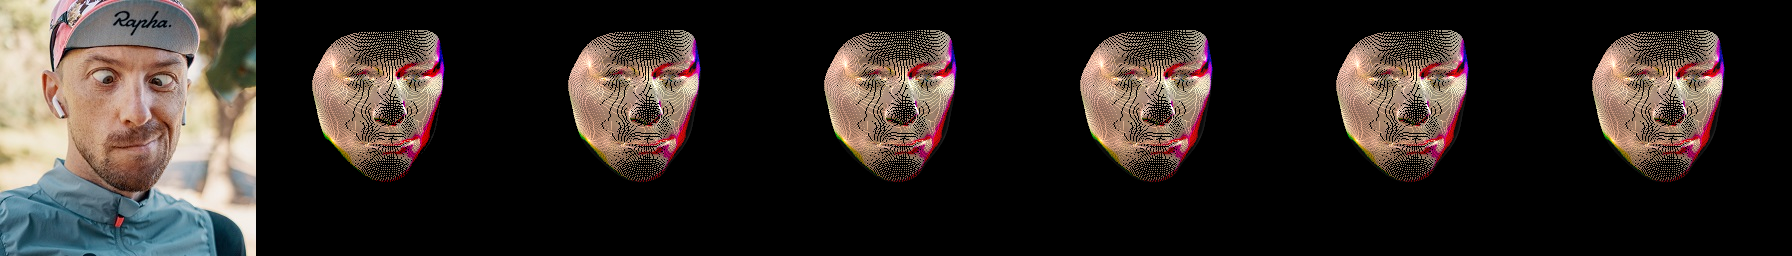

In [5]:
#display results
from IPython.display import Image, display
from IPython.display import Image

display(Image(outputDir + '/render_0.png'))


In [10]:
# display meshes in polyscope
import polyscope as ps
import trimesh
import glob
import torch

# Get a list of all .obj files in the directory
obj_files = glob.glob(os.path.join(outputDir + '/debug', "*.obj"))

# Initialize polyscope
ps.init()
# Flip the axis to Y up
ps.set_up_dir("neg_y_up")

grid_size = 7  # Define grid size
mesh_spacing = 150  # Define spacing between meshes

# Calculate the center of the grid
grid_center = mesh_spacing * (grid_size - 1) / 2

# Load and register each mesh to polyscope
for idx, obj_file in enumerate(obj_files):
    # Calculate grid position (i = row, j = column)
    i = idx // grid_size
    j = idx % grid_size

    # Load the mesh from an obj file using trimesh
    mesh = trimesh.load_mesh(obj_file)
    
    # Add an offset to the x and y coordinates of the vertices to move the mesh
    # Adjust the offsets by subtracting the grid_center to center the grid at the origin
    x_offset = j * mesh_spacing - grid_center  # Offset x-coordinates
    y_offset = i * mesh_spacing - grid_center  # Offset y-coordinates
    mesh.vertices[:, 0] += x_offset
    mesh.vertices[:, 1] += y_offset

    # Register the mesh to polyscope
    ps_mesh = ps.register_surface_mesh(f"{obj_file}", mesh.vertices, mesh.faces)
    
    # Set a different color for each mesh
    color = torch.rand(3).numpy()  # generate a random color
    ps_mesh.set_color(color)

# Show the mesh
ps.show()
